In [3]:
# Project 1: Time Series Analysis of CPUE Patterns

# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# Load dataset
data_path = "../data/squid_cpue.csv"  
df = pd.read_csv(data_path)


In [5]:
# Remove extra spaces in column names (common CSV issue)
df.columns = df.columns.str.strip()

In [6]:
# Convert to datetime and rename Year column
df.rename(columns={"Year1": "Year"}, inplace=True)
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

In [7]:
# Assume 1 day = 1 unit of effort
df["CPUE"] = df["SqCatch_Kg"]

In [8]:
# Group by Year and Month
monthly_cpue = (
    df.groupby(["Year", "Month"])
    .agg(
        TotalCatch=("CPUE", "sum"),# sums the squid catch kg per month in each year as shown in groupby function
        DaysFished=("Day", "count")  # counts number of fishing days per month in each year as shown in groupby function
    )
    .reset_index()
)

# Calculate monthly CPUE = total catch / days fished
monthly_cpue["Monthly_CPUE"] = monthly_cpue["TotalCatch"] / monthly_cpue["DaysFished"]
monthly_cpue.sort_values(["Year", "Month"], inplace=True)

# Show the monthly CPUE table
monthly_cpue.head(12)

,Year,Month,TotalCatch,DaysFished,Monthly_CPUE
0,2000,1,2.648377e+07,2208,11994.459998
1,2000,2,6.532798e+07,2803,23306.450875
2,2000,3,7.424052e+07,3024,24550.437656
3,2000,4,3.705659e+07,2932,12638.674576
4,2000,5,2.593114e+07,2862,9060.495904
5,2000,6,6.796407e+06,1117,6084.518122
6,2000,7,1.548881e+06,157,9865.482517
7,2000,8,2.190571e+05,24,9127.379498
8,2000,11,1.929571e+05,24,8039.877587
9,2000,12,1.013766e+07,768,13200.082180


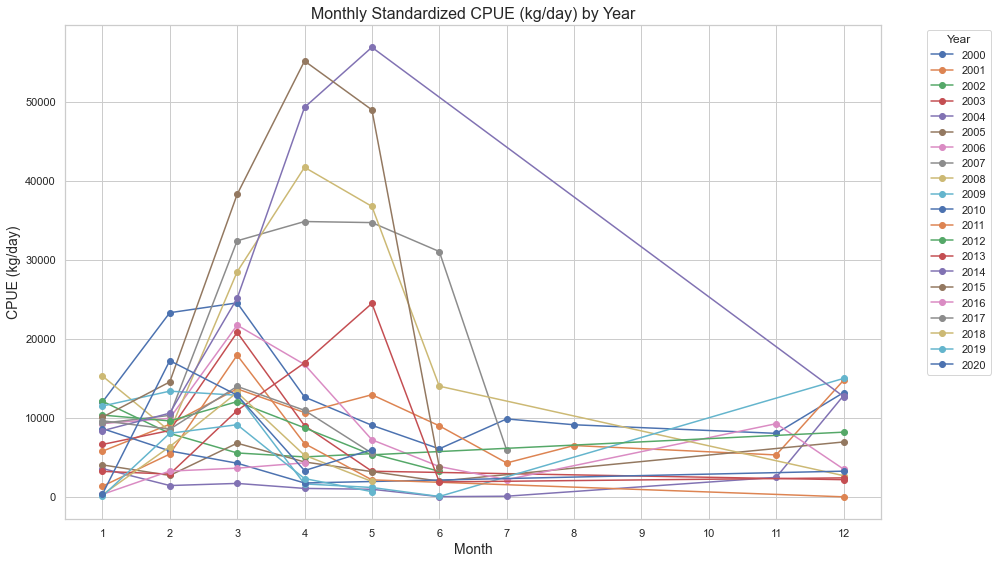

In [9]:

# Save summary statistics
summary = monthly_cpue.groupby("Year")["Monthly_CPUE"].describe()
summary.to_csv("../results/summaries/yearly_cpue_summary.csv")

# Create an interactive line plot
fig = px.line(
    monthly_cpue,
    x="Month",
    y="Monthly_CPUE",
    color="Year",
    markers=True,
    title="Monthly Standardized CPUE (kg/day) by Year",
    labels={"Monthly_CPUE": "CPUE (kg/day)", "Month": "Month"}
)

# Customize layout
fig.update_layout(
    legend_title="Year",
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),
    hovermode='x unified',
    width=900,
    height=600
)

# Save as interactive HTML
fig.write_html("../results/plots/monthly_cpue_plot.html")

fig.show()

# Static Matplotlib Plot (Saved as PDF)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

years = monthly_cpue["Year"].unique()
for year in years:
    data = monthly_cpue[monthly_cpue["Year"] == year]
    plt.plot(data["Month"], data["Monthly_CPUE"], label=year, marker="o")

plt.title("Monthly Standardized CPUE (kg/day) by Year", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("CPUE (kg/day)", fontsize=14)
plt.xticks(range(1, 13))
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Save static plot as PDF (always works)
plt.savefig("../results/plots/monthly_cpue_plot_static.pdf")